In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor

from sklearn.metrics import mean_squared_log_error, median_absolute_error, explained_variance_score, max_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import pandas as pd

# Read the csv file
df2 = pd.read_csv('merged.csv')
df = pd.read_csv('modified_file2.csv')



Performing Exploratory Data Analysis(EDA)

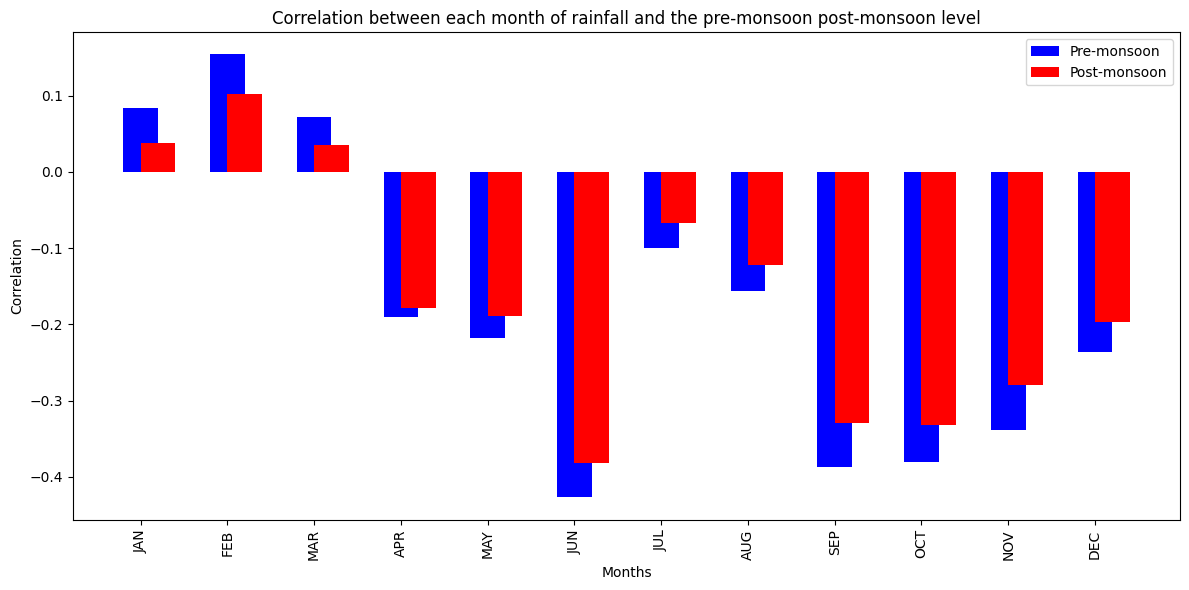

In [26]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

corelation_pre = [df['Post-monsoon_2022 (meters below ground level)'].corr(df[month]) for month in months]
corelation_post = [df['Pre-monsoon_2022 (meters below ground level)'].corr(df[month]) for month in months]

x = range(len(months))

plt.figure(figsize=(12, 6))

plt.bar(x, corelation_pre, width=0.4, label='Pre-monsoon', color='b', align='center')
plt.bar(x, corelation_post, width=0.4, label='Post-monsoon', color='r', align='edge')

plt.xlabel('Months')
plt.ylabel('Correlation')
plt.title('Correlation between each month of rainfall and the pre-monsoon post-monsoon level')
plt.xticks(x, months, rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()

Now defining the features variables (using the pre & post moonsoon data from 2015 to 2021 )

In [27]:
features1 = df[['Pre-monsoon_2015 (meters below ground level)', 'Post-monsoon_2015 (meters below ground level)', 'Pre-monsoon_2016 (meters below ground level)', 'Post-monsoon_2016 (meters below ground level)', 'Pre-monsoon_2017 (meters below ground level)', 'Post-monsoon_2017 (meters below ground level)', 'Pre-monsoon_2018 (meters below ground level)', 'Post-monsoon_2018 (meters below ground level)', 'Pre-monsoon_2019 (meters below ground level)', 'Post-monsoon_2019 (meters below ground level)', 'Pre-monsoon_2020 (meters below ground level)', 'Post-monsoon_2020 (meters below ground level)', 'Pre-monsoon_2021 (meters below ground level)', 'Post-monsoon_2021 (meters below ground level)', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec' ]]
aquifer_encoded = pd.get_dummies(df['Aquifer'])

# Concatenate the one-hot encoded dataframe with the original features dataframe
features = pd.concat([features1, aquifer_encoded], axis=1)


Defining the target variables. (predicting the pre & post moonsoon data from 2022)

In [28]:
target = df[['Pre-monsoon_2022 (meters below ground level)', 'Post-monsoon_2022 (meters below ground level)']]

Splitting the data into training and testing datasets.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
#Currently using 50/50 split
model = MultiOutputRegressor(GradientBoostingRegressor(random_state=0))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=0))

Evaluation of the model

In [30]:
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)

print(f'The model score is {score}')

The model score is 0.978303776387295


now using random-forest.

In [31]:
model_rf = MultiOutputRegressor(RandomForestRegressor(random_state=0))

# Fit the model
model_rf.fit(X_train, y_train)

# Predict the test set results
y_pred_rf = model_rf.predict(X_test)

# Calculate the R2 score
score_rf = r2_score(y_test, y_pred_rf)


Evaluating random forest model.

In [32]:
print(f'The Random Forest model score is {score_rf}')

The Random Forest model score is 0.9795353571956991


Graphing the models comparitively

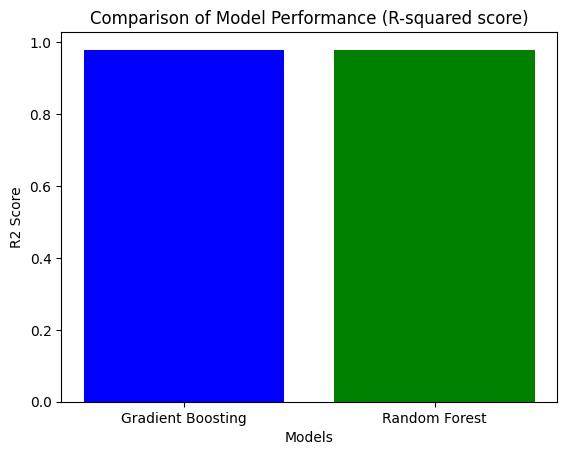

In [33]:
models = ['Gradient Boosting', 'Random Forest']

# Corresponding scores
scores = [score, score_rf]

plt.bar(models, scores, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparison of Model Performance (R-squared score)')
plt.show()

Now comparing on other matrices.

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate metrics for Gradient Boosting
mae_gb = mean_absolute_error(y_test, y_pred)
mse_gb = mean_squared_error(y_test, y_pred)
rmse_gb = np.sqrt(mse_gb)

# Calculate metrics for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Define the models and their corresponding metrics
models = ['Gradient Boosting', 'Random Forest']
mae_scores = [mae_gb, mae_rf]
mse_scores = [mse_gb, mse_rf]
rmse_scores = [rmse_gb, rmse_rf]


# Calculate additional metrics for Gradient Boosting
medae_gb = median_absolute_error(y_test, y_pred)
evs_gb = explained_variance_score(y_test, y_pred)

# Calculate additional metrics for Random Forest
medae_rf = median_absolute_error(y_test, y_pred_rf)
evs_rf = explained_variance_score(y_test, y_pred_rf)

# Print all metrics for both models
print("Gradient Boosting Metrics:")
print(f"MAE: {mae_gb}, MSE: {mse_gb}, RMSE: {rmse_gb}, MedAE: {medae_gb}, EVS: {evs_gb}\n")

print("Random Forest Metrics:")
print(f"MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, MedAE: {medae_rf}, EVS: {evs_rf}\n")

Gradient Boosting Metrics:
MAE: 1.940786330368346, MSE: 12.117326255173552, RMSE: 3.4809950093577484, MedAE: 1.1520591939886218, EVS: 0.9783459405099562

Random Forest Metrics:
MAE: 1.86584203125, MSE: 11.352715435640624, RMSE: 3.3693790875531686, MedAE: 1.0497249999999902, EVS: 0.9796004191056489


Now using a neural Network.
We are using neural network from tensorflow.

In [24]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential

For simplicity, let's create a model with one hidden layer. The input and output layer sizes should match the number of features and the number of output variables, respectively.

In [35]:
from tensorflow.keras.losses import Huber
model = Sequential()
model.add(Input(shape=(len(X_train.columns),)))  # Input layer
model.add(Dense(32, activation='relu'))# Hidden layer
model.add(Dense(32, activation='relu'))# Hidden layer
model.add(Dense(2))  # Output layer
model.compile(loss='huber', optimizer='adam')
# Train the model on the training data
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))
print(f"Shape of X_test: {X_test.shape}")

Epoch 1/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.2776 - val_loss: 5.5720
Epoch 2/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 4.4838 - val_loss: 3.5313
Epoch 3/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 3.2689 - val_loss: 3.0799
Epoch 4/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 2.9541 - val_loss: 2.8248
Epoch 5/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 2.8779 - val_loss: 2.5830
Epoch 6/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 2.4799 - val_loss: 2.5707
Epoch 7/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 2.4516 - val_loss: 3.0848
Epoch 8/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 2.5159 - val_loss: 2.4619
Epoch 9/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 2.4038 - val_loss: 2.1794
Epoch 10/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 2.1992 - val_loss: 2.0952
Epoch 11/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 2.0198 - val_loss: 2.0186
Epoch 12/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s

In [36]:
# Predict the test set results
y_pred_nn = model.predict(X_test)

# No need to reshape y_pred_nn


mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
medae_nn = median_absolute_error(y_test, y_pred_nn)
 
evs_nn = explained_variance_score(y_test, y_pred_nn)

print("Neural Network Metrics:")
print(f"MAE: {mae_nn}, MSE: {mse_nn}, RMSE: {rmse_nn}, MedAE: {medae_nn}, EVS: {evs_nn}\n")
def nse(y_true, y_pred):
    y_true = y_true.values.ravel().astype(float)
    y_pred = y_pred.ravel().astype(float)
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

# Calculate NSE for the model
nse_nn = nse(y_test, y_pred_nn)

print(f"Neural Network NSE: {nse_nn}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
Neural Network Metrics:
MAE: 1.9135012964494515, MSE: 8.8934326254731, RMSE: 2.982185880436211, MedAE: 1.2268434381484985, EVS: 0.9844949697662024

Neural Network NSE: 0.9841176384337428


Adding graphs.

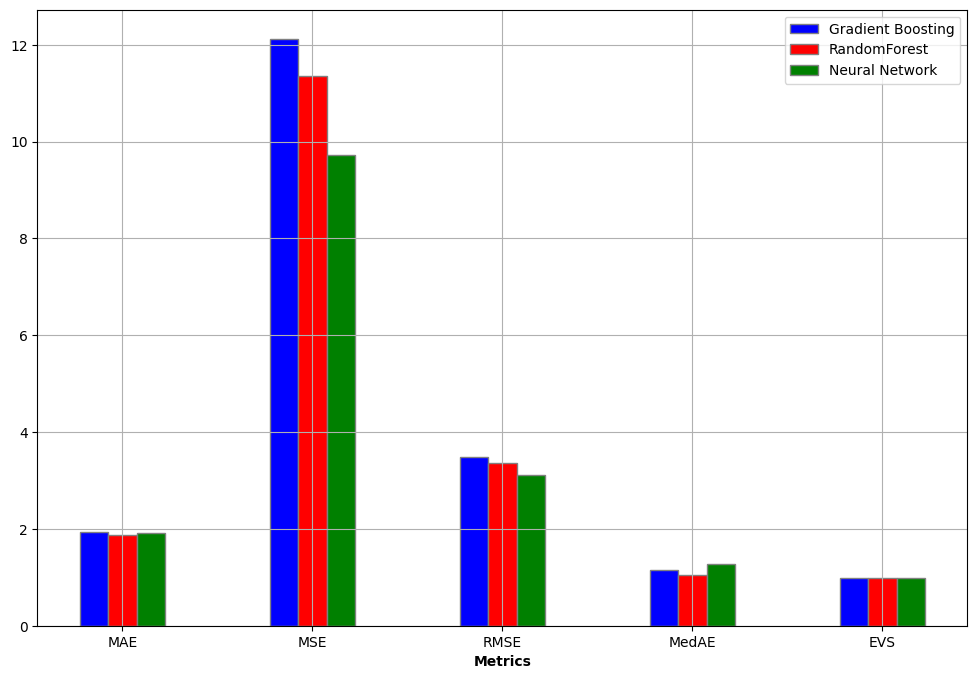

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Set the width of the bars
barWidth = 0.15

# Assuming you have these metrics for each model
metrics = {
    'Gradient Boosting': {'MAE': mae_gb, 'MSE': mse_gb, 'RMSE': rmse_gb, 'MedAE': medae_gb, 'EVS': evs_gb},
    'RandomForest': {'MAE': mae_rf, 'MSE': mse_rf, 'RMSE': rmse_rf, 'MedAE': medae_rf, 'EVS': evs_rf},
    'Neural Network': {'MAE': mae_nn, 'MSE': mse_nn, 'RMSE': rmse_nn, 'MedAE': medae_nn, 'EVS': evs_nn}
}

# Restructure the data
metrics_by_model = {
    'MAE': {model: metrics[model]['MAE'] for model in metrics},
    'MSE': {model: metrics[model]['MSE'] for model in metrics},
    'RMSE': {model: metrics[model]['RMSE'] for model in metrics},
    'MedAE': {model: metrics[model]['MedAE'] for model in metrics},
    'EVS': {model: metrics[model]['EVS'] for model in metrics},
}

# Set position of bar on X axis
r1 = np.arange(len(metrics_by_model))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(12, 8))

# Make the plot
colors = ['b', 'r', 'g', 'y', 'm', 'c']  # Add more colors if needed
for i, model in enumerate(metrics):
    plt.bar([r + i*barWidth for r in r1], list(metrics[model].values()), color=colors[i % len(colors)], width=barWidth, edgecolor='grey', label=model)

# Adding xticks
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(metrics_by_model))], [metric for metric in metrics_by_model])
plt.legend()
plt.grid()
plt.show()